https://leetcode.com/problems/palindrome-permutation-ii/discuss/69717/Backtrack-Summary%3A-General-Solution-for-10-Questions!!!!!!!!-Python-(Combination-Sum-Subsets-Permutation-Palindrome)
77. Combinations: 利用迭代

In [1]:
class Solution(object):
    def solveSudoku(self, board):
        """
        :type board: List[List[str]]
        :rtype: None Do not return anything, modify board in-place instead.
        """
        self.board = board
        if self.board[0][0]=='.':
            i,j=0,0
        else:
            i,j=self.FindNext(0,0)
        self.ans = []
        self.backtrack(i,j)
        
        return self.ans
        
    def isValid(self,row,col,value):
        for i in range(0, 9):  # Row
            if self.board[row][i] == value:
                return False
        for j in range(0, 9):  # column
            if self.board[j][col] == value:
                return False
        row = row // 3 * 3
        col = col // 3 * 3
        for i in range(row, row + 3):  # block
            for j in range(col, col + 3):
                if self.board[i][j] == value:
                    return False
        return True
    
#         if value in self.board[row]:
#             return False
#         if value in [i[col] for i in self.board]:
#             return False
#         if value in [i[col//3*3:(col//3+1)*3] for i in self.board[row//3*3:(row//3+1)*3]]:
#             return False
#         return True
        
    
    def FindNext(self,row,col):
        for j in range(col+1,9):
            if self.board[row][j]=='.':
                return [row,j]
        for i in range(row+1,9):
            for j in range(0,9):
                if self.board[i][j]=='.':
                    return [i,j]
        return [-1,-1]
    
    def backtrack(self,i,j):
        for num in ['1','2','3','4','5','6','7','8','9']:
            if self.isValid(i,j,num):
                [nexti,nextj] = self.FindNext(i,j)
                self.board[i][j]=num
                if (nexti==-1) and (nextj==-1):#如果目前答案是对的，则记录
                    self.ans.append(self.clone(self.board))
#                     return True
                else:# 还没到底，继续往下走
                    self.backtrack(nexti,nextj)
#                     return True
                self.board[i][j]='.'#重置为初始，就当这个解不存在
#         return False
    def clone(self,old_matrix): ###用来复制当前答案
        new_matrix = []
        for i in range(0, 9):
            line = []
            for j in range(0, 9):
                line.append(old_matrix[i][j])
            new_matrix.append(line)
        return new_matrix

In [2]:
sol = Solution()
inp = [[".",".",".",".",".",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
sol.solveSudoku(inp)

[[['3', '4', '5', '6', '7', '8', '9', '1', '2'],
  ['6', '7', '2', '1', '9', '5', '3', '4', '8'],
  ['1', '9', '8', '3', '4', '2', '5', '6', '7'],
  ['8', '5', '9', '7', '6', '1', '4', '2', '3'],
  ['4', '2', '6', '8', '5', '3', '7', '9', '1'],
  ['7', '1', '3', '9', '2', '4', '8', '5', '6'],
  ['9', '6', '1', '5', '3', '7', '2', '8', '4'],
  ['2', '8', '7', '4', '1', '9', '6', '3', '5'],
  ['5', '3', '4', '2', '8', '6', '1', '7', '9']],
 [['5', '3', '4', '6', '7', '8', '9', '1', '2'],
  ['6', '7', '2', '1', '9', '5', '3', '4', '8'],
  ['1', '9', '8', '3', '4', '2', '5', '6', '7'],
  ['8', '5', '9', '7', '6', '1', '4', '2', '3'],
  ['4', '2', '6', '8', '5', '3', '7', '9', '1'],
  ['7', '1', '3', '9', '2', '4', '8', '5', '6'],
  ['9', '6', '1', '5', '3', '7', '2', '8', '4'],
  ['2', '8', '7', '4', '1', '9', '6', '3', '5'],
  ['3', '4', '5', '2', '8', '6', '1', '7', '9']]]

In [3]:
class Solution(object):
    def solveNQueens(self, n):
        """
        :type n: int
        :rtype: List[List[str]]
        """
        self.n = n
        self.queen = ["." * n for _ in range(n)]
        self.result = []
        self.backtrack(0)
        return self.result
        
    def isValid(self,row,col):
        for i in range(row):
            if self.queen[i][col] == 'Q':
                return False
            if col+row-i<self.n and self.queen[i][col+row-i]=='Q':
                return False
            if col-row+i>=0 and self.queen[i][col-row+i]=='Q':
                return False
        return True

    def assign(self,i,j,val):
        res = self.queen[i][:j]+val+self.queen[i][j+1:]
        return self.queen[:i]+[res]+self.queen[i+1:]
        
    def backtrack(self,row):
        for j in range(self.n):
            if self.isValid(row,j):
                self.queen=self.assign(row,j,'Q')
                newrow = row+1
                if newrow == self.n:
                    self.result.append(self.queen)
                else:
                    self.backtrack(newrow)
                self.queen= self.assign(row,j,'.')
#         return False
                    

In [4]:
sol = Solution()
sol.solveNQueens(4)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]

In [1]:
# 1307. Verbal Arithmetic Puzzle，算数字谜
def isSolvable(words, result):
    """
    :type words: List[str]
    :type result: str
    :rtype: bool
    """
    n = max(len(i) for i in words+[result])#整个的总长度
    first = {i[0] for i in words+[result]}#所有单词的leading
    def calDigit(carry,digit,curhash,visited):#进位，当前位，映射关系，出现过的数
        if digit>n:
            return True
        current = [word[-digit] for word in words if len(word)>=digit]#当前位
        total = result[-digit]#当前和
        placed = []
        cursum = 0
        for i in current:#当前位中已经确定的
            if i in curhash:
                cursum += curhash[i]
            else:
                placed.append(i)
        if len(placed)==0:#如果加数都确定了
            if total in first and (cursum+carry)%10==0:#如果和为0，但在first中
                return False
            if total in curhash:
                if ((cursum+carry)%10)!=curhash[total]:#如果不满足
                    return False
                else:#如果满足了，就往前走
                    if calDigit((cursum+carry)//10,digit+1,curhash,visited):
                        return True
            else:#如果和还没确定
                if visited&(1<<(cursum+carry)%10):#计算出来的和已经出现过了
                    return False
                else:#当前确定，往前走
                    curhash[total] = (cursum+carry)%10
                    if calDigit((cursum+carry)//10,digit+1,curhash,visited|1<<(cursum+carry)%10):
                        return True
                    curhash.pop(total)#这里一定要pop
        else:
            for i in range(10):#给加数猜测一下，每个数字取各种可能情况
                if i==0 and placed[0] in first:
                    continue
                if visited&(1<<i)==0:
                    curhash[placed[0]] = i
                    if calDigit(carry,digit,curhash,visited|1<<i):
                        return True
                    curhash.pop(placed[0])
        return False#猜测完了还不满足
        
    return calDigit(0,1,dict(),0)
isSolvable(words = ["SIX","SEVEN","SEVEN"], result = "TWENTY")

True

In [19]:
# 77. Combinations
# F(n,k)=F(n-1,k)+F(n-1,k-1)+n
# F(n,k)=F(n-1,k-1)+[k,n]
def combine(n, k):
    """
    :type n: int
    :type k: int
    :rtype: List[List[int]]
    """
    dp = [[[] for _ in range(k+1)] for _ in range(n+1)]
    for i in range(1,n+1):
        dp[i][1]=[[j] for j in range(1,i+1)]
    for i in range(1,k+1):
        dp[i][i]=[[j for j in range(1,i+1)]]
    for j in range(1,k):
        for i in range(j+1,n):
            temp =[ele+[i+1] for ele in dp[i][j]]
            dp[i+1][j+1] = dp[i][j+1]+temp
    return dp[-1][-1]
print(combine(5,3))

def combine(n, k):
    if k <=0:
        return [[]]
    return [pre + [i] for i in range(k, n+1) for pre in combine(i-1, k-1)]

[[1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4], [1, 2, 5], [1, 3, 5], [2, 3, 5], [1, 4, 5], [2, 4, 5], [3, 4, 5]]


In [1]:
# 842. Split Array into Fibonacci Sequence，将一个字符串分解成Fibonacci序列
def splitIntoFibonacci(S):
    """
    :type S: str
    :rtype: List[int]
    """
    stack = []
    if S[0] =='0':#初始部分
        stack.append([1,0])
    else:
        for i in range((len(S)-1)//2):
            stack.append([i+1,int(S[:i+1])])
    while stack:
        cur = stack.pop()
        if len(cur)==2:#迭代部分
            for i in range(1,1+min((len(S)-cur[0])//2,len(S)-2*cur[0])):
                if i==1 and S[cur[0]]=='0':
                    cur[0]+=1
                    cur.append(0)
                    stack.append(cur)
                    break
                else:
                    curnum=int(S[cur[0]:cur[0]+i])
                    if curnum>2**31-1:
                        continue
                    temp = cur+[curnum]
                    temp[0]+=i
                    stack.append(temp)
        else:#第二个值
            if cur[0] == len(S):
                return cur[1:]
            num = cur[-1]+cur[-2]
            if num>2**31-1:
                continue
            if num==0 and S[cur[0]]=='0':
                cur[0]+=1
                cur.append(0)
                stack.append(cur)
            else:
                leng = len(str(num))
                if cur[0]+leng<=len(S) and S[cur[0]:cur[0]+leng]==str(num):
                    cur[0]+=leng
                    cur.append(num)
                    stack.append(cur)
    return []
splitIntoFibonacci("1101111")

[110, 1, 111]

In [2]:
# 1255. Maximum Score Words Formed by Letters，给定每个字母的分数和频次，在可能的words中挑选，得到最大分数
# 
import collections
def maxScoreWords(words, letters, score):
    """
    :type words: List[str]
    :type letters: List[str]
    :type score: List[int]
    :rtype: int
    """
    counts = collections.Counter(letters)
    scores = dict()
    for i in counts:
        scores[i] = score[ord(i)-ord('a')]

    def dfs(curused,curpos,curscore,res):

        if curpos<len(words):
            dfs(curused,curpos+1,curscore,res)#不要这个单词，直接往前走

            temp = collections.Counter(words[curpos])#要当前的单词
            for i in temp:#要不起
                if curused[i]+temp[i]>counts[i]:
                    return
            curused = curused+temp
            tempscore = 0
            for i in temp:
                tempscore+=temp[i]*scores[i]
            curscore +=tempscore
            if curscore>res[0]:
                res[0] = curscore
            dfs(curused,curpos+1,curscore,res)

    res = [0]
    dfs(collections.Counter(),0,0,res)
    return res[0]
maxScoreWords(words = ["dog","cat","dad","good"], letters = ["a","a","c","d","d","d","g","o","o"], score = [1,0,9,5,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0])

23

In [6]:
# 291. Word Pattern II，是否能建立从一个字符串到另一个字符串的一一映射
# 两个都往前进行，尝试各种配对，然后看是否能往下走，不能走就回头

# 更新字典迭代，但是不要保留字典的方法，dict(list(a.items())+list(b.items()))
# 或者添加以后，再后面删除掉
def wordPatternMatch(pattern, str):
    """
    :type pattern: str
    :type str: str
    :rtype: bool
    """
    def dfs(cur,p,match):
        if cur==len(str) and p==len(pattern):#如果两个都走到了终点，那么正确
            return True
        if len(str)-cur<len(pattern)-p or p==len(pattern):#如果pattern剩下的长度比str要大，或者pattern走到了终点，则错误
            return False
        if pattern[p] in match:#如果出现了，那么往下走
            temp = match[pattern[p]]
            if len(temp)<=len(str)-cur and str[cur:cur+len(temp)]==temp:#对得上，则进行
                return dfs(cur+len(temp),p+1,match)
            else:#对不上，则错误
                return False
        else:
            item = list(match.items())
            for i in range(cur,len(str)):
                temp = str[cur:i+1]
                if temp in match.values():#要保持一一映射
                    continue
                if dfs(i+1,p+1,dict(item+[(pattern[p],temp)])):#这里更新匹配函数，但是不要保存
                    return True
            return False

    return dfs(0,0,dict())
wordPatternMatch("abab","baba")

True

In [21]:
# 784. Letter Case Permutation
# 给定含有字符与数字的字符串，输出大小写字符形式的所有情况
def letterCasePermutation(S):
    """
    :type S: str
    :rtype: List[str]
    """
    res = []
    i = 0
    cur = ""
    while i<len(S) and S[i].isdigit():
        cur+=S[i]
        i=i+1
    if i<len(S):
        t = letterCasePermutation(S[i+1:])
        for j in t:
            res.append(cur+S[i].lower()+j)
            res.append(cur+S[i].upper()+j)
    else:
        res.append(cur)
    return res

def letterCasePermutation(S):
    res = ['']
    for ch in S:
        if ch.isalpha():
            res = [i+j for i in res for j in [ch.upper(), ch.lower()]]
        else:
            res = [i+ch for i in res]
    return res
letterCasePermutation(S = "")

['']

In [1]:
#1087. Brace Expansion，和#784类似
def expand(S):#recursive
    """
    :type S: str
    :rtype: List[str]
    """
    if not S:
        return [""]
    start = 0
    cur = ""
    while start<len(S) and S[start]!='{':
        cur = cur+S[start]
        start = start+1
    brac = []
    while start<len(S) and S[start]!="}":
        if S[start].isalpha():
            brac.append(S[start])
        start = start+1
    brac.sort()
    t = self.expand(S[start+1:])
    res = []
    if brac:
        for i in brac:
            if t:
                for j in t:
                    res.append(cur+i+j)
            else:
                res.append(cur+i)
    else:
        res.append(cur)

    return res

def expand(S):#iterative
    bfs = [""]
    mult = False
    chars = []
    for s in S:
        if s == ',': 
            continue
        elif s == '{':
            mult = True
        elif s == '}':
            bfs = [st + c for st in bfs for c in chars]
            chars = []
            mult = False
        elif mult:
            chars.append(s)
        else:
            bfs = [st + s for st in bfs]
    return sorted(bfs)

In [41]:
# 89. Gray Code，格雷码
# 先生成[0]，然后对称的同时在首位上改0为1(相当于加上n)
def grayCode(n):
    res = [0]
    for i in range(n):
        res = res + [x+2**i for x in res[::-1]]
    return res
grayCode(1)

[0, 1]

In [49]:
# 980. Unique Paths III
class Solution():
    def uniquePathsIII(self,grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        if not grid:
            return 0
        m,n=len(grid),len(grid[0])

        empty = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j]==1:
                    start = (i,j)
                if grid[i][j]==2:
                    end = (i,j)
                if grid[i][j]==0:
                    empty+=1

        def dfs(i,j,visited):
            if (i,j)==end:
                if len(visited)==empty+2:
                    self.count+=1
                return
            for dx,dy in [(-1,0),(1,0),(0,1),(0,-1)]:
                x,y=i+dx,j+dy
                if 0<=x<m and 0<=y<n and grid[x][y]!=-1 and (x,y) not in visited:
                    visited.add((x,y))
                    dfs(x,y,visited)
                    visited.remove((x,y))
            return

        self.count = 0
        dfs(start[0],start[1],{start})
        return self.count
    
    def uniquePathsIII(self, A):
        self.res = 0
        m, n,empty = len(A), len(A[0]),1
        for i in range(m):
            for j in range(n):
                if A[i][j] == 1: x,y = (i, j)
                elif A[i][j] == 2: end = (i, j)
                elif A[i][j] == 0: empty += 1
        def dfs(x, y, empty):
            if not (0 <= x < m and 0 <= y < n and A[x][y] >= 0): return
            if (x, y) == end:
                self.res += empty == 0
                return
            A[x][y] = -2
            dfs(x + 1, y, empty - 1)
            dfs(x - 1, y, empty - 1)
            dfs(x, y + 1, empty - 1)
            dfs(x, y - 1, empty - 1)
            A[x][y] = 0
        dfs(x,y, empty)
        return self.res
sol = Solution()
sol.uniquePathsIII([[0,1],[2,0]])

In [23]:
# 254. Factor Combinations，找出一个数的所有因式分解形式
# 从前面一个数开始一直递增，增到sqrt(n)，如果能够整除，则把剩下的丢进递归，递归出来的结果和之前的结合

def getFactors(n):
    """
    :type n: int
    :rtype: List[List[int]]
    """
    def getFact(n,tail=2):
        res = []
        for i in range(tail,int(n**0.5)+1):
            if n%i==0:
                temp  = getFact(n//i,i)
                res += [[i]+item for item in temp]
        res.append([n])
        return res
    return getFact(n)[:-1]
getFactors(32)

[[2, 2, 2, 2, 2], [2, 2, 2, 4], [2, 2, 8], [2, 4, 4], [2, 16], [4, 8]]

In [38]:
#401. Binary Watch,时针分钟从中选择

def readBinaryWatch(num):
    """
    :type num: int
    :rtype: List[str]
    """
    res = []
    hourPool = [1,2,4,8]
    minPool = [1,2,4,8,16,32]
    def getRes(n,pool,limit,index=0):#从pool中选择n个数
        if n==0:
            return [0]
        if n==1:
            return pool[index:]
        res = []
        for i in range(index,len(pool)):
            temp = getRes(n-1,pool,limit,i+1)
            res += [pool[i]+item for item in temp if pool[i]+item<limit]
        return res        

    for i in range(num+1):
        # i for hours, num-i for mins
        hours = getRes(i,hourPool,12)
        mins = getRes(num-i,minPool,60)
        for t1 in hours:
            for t2 in mins:
                t3 = str(t2) if t2>=10 else '0'+str(t2)
                res.append(str(t1)+':'+t3)
    return res
readBinaryWatch(1)

In [1]:
# 526. Beautiful Arrangement,1-n的排列，可以让每个数要么被i整除要么能整除i
# 从1-n一个个排，每次尝试从库中取出一个数，如果能进行则取出递进，递进后要再还回去。如果能走到最后，则统计
def countArrangement(N):
    """
    :type N: int
    :rtype: int
    """
    res = [0]
    stock = set([i for i in range(1,N+1)])
    def buildRange(idx,stock,res):
        if len(stock)==0:
            res[0]+=1
            return 
        for i in stock:
            if i%idx==0 or idx%i==0:
                stock.remove(i)
                buildRange(idx+1,stock,res)
                stock.add(i)

    buildRange(1,stock,res)
    return res[0]

def countArrangement(N):
    """
    :type N: int
    :rtype: int
    """
    dp = dict()
    def dfs(index,visited):#已经有visited的数的情况下的个数
        if visited in dp:
            return dp[visited]
        if index==N+1:
            return 1
        res = 0
        for i in range(1,N+1):
            if visited&1<<(i-1)==0 and (index%i==0 or i%index==0):
                res+=dfs(index+1,visited|1<<(i-1))
        dp[visited] = res
        return res
    return dfs(1,0)
countArrangement(10)

1699

In [ ]:
# 1219. Path with Maximum Gold,在矩阵中找一条路径使得和最大
# 从任何一点出发，一直往可能的方向走，连同更新visited，如果不能走了就更新maximum
# 不能通过相邻数为1来找端点，因为可能会出现一整块区域有效
def getMaximumGold(grid):
    """
    :type grid: List[List[int]]
    :rtype: int
    """
    if not grid or not grid[0]:
        return 0
    m,n = len(grid),len(grid[0])
    maximum = [0]
    directions = [(-1,0),(1,0),(0,1),(0,-1)]
    def dfs(i,j,visited,cursum,maximum):
        count=0
        for dx,dy in directions:
            x,y=i+dx,j+dy
            if 0<=x<m and 0<=y<n and grid[x][y] and not visited[x][y]:
                count+=1
                visited[x][y]=True
                dfs(x,y,visited,cursum+grid[x][y],maximum)
                visited[x][y]=False
        if count==0:
            maximum[0] = max(maximum[0],cursum)
            return 

    for i in range(m):
        for j in range(n):
            if grid[i][j]:
                visited = [[False for _ in range(n)] for _ in range(m)]
                visited[i][j]=True
                dfs(i,j,visited,grid[i][j],maximum)
    return maximum[0]

In [ ]:
def pylonPath(R,C):
    def dfs(i,j,count,path,visited):
        if count==R*C:
            return path
        for x,y in can_go[(i,j)]:
            if not visited[x][y]:
                visited[x][y] = True
                path.append((x,y))
                res = dfs(x,y,count+1,path,visited)
                if res:
                    return res
                visited[x][y]=False
                path.pop()
                    
    def valid(i,j,x,y):
        if i==x or j==y or i+j == x+y or i-j==x-y:
            return False
        return True
    
    can_go = {}
    for i in range(R):
        for j in range(C):
            can_go[(i, j)] = {(ii, jj) for ii in range(R) for jj in range(C) if valid(i, j, ii, jj)}
    
    visited = [[False for _ in range(C)] for _ in range(R)]
    i,j=0,0
    visited[i][j]=True
    res = dfs(i,j,1,[(i,j)],visited)
    if res:
        return res
    return False

def pylonPath(R,C):
    def dfs(R, C, can_go, cur_i, cur_j, visited, path, result):
        if len(visited) == R * C: # successfully find path
            result[:] = path
            return True
        for next_i, next_j in can_go[(cur_i, cur_j)]:
            if (next_i, next_j) not in visited and dfs(R, C, can_go, next_i, next_j, visited | {(next_i, next_j)}, path + [(next_i, next_j)], result):
                return True
        return False

    def valid(i, j, ii, jj):
        return (i != ii) and (j != jj) and (i - j) != (ii - jj) and (i + j) != (ii + jj)

    def is_possible(R, C):
        can_go = {}
        for i in range(R):
            for j in range(C):
                can_go[(i, j)] = {(ii, jj) for ii in range(R) for jj in range(C) if valid(i, j, ii, jj)}

        result = []
        for i in range(R):
            for j in range(C):
                if dfs(R, C, can_go, i, j, set(), [], result):
                    return result
        return []


    return is_possible(R, C)
pylonPath(5,5)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
plt.ion()

In [8]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [14]:
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

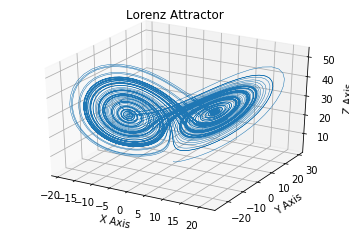

In [10]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [56]:
xs

array([0.        , 0.1       , 0.189     , ..., 8.77456852, 9.23628078,
       9.70996188])

In [62]:
import numpy.matlib

In [111]:
from scipy.integrate import odeint

v0 = np.array([1.508870, -1.531271, 25.46091])
v0 = np.array([1.0, 1.0, 1.0])
sigma = 10
beta = 8/3
rho = 28
H = np.identity(3)

Q = 10 # Variance of the model error
R = 1 # Variance of the data error
Q_init = 100 #  Variance of the initial condition
n_cycle = 100# Number of data assimilation cycles
meas_dim , state_dim = H.shape
Dt = 0.1 # Frequency of measurement
nbv = 1000# Ensemble number
test_which = 1# 0 - EnKF / 1 - PCE / 2 - Both / 3 - Both only plot comparison and leave it open

# gen_func = @(X1,X2,X3,x,y,z) [sum(sum(sum(hermite_matrix(x,y,z).*X1)));sum(sum(sum(hermite_matrix(x,y,z).*X2)));sum(sum(sum(hermite_matrix(x,y,z).*X3)))];


def hermite(n,x):
    if n==0:
        return 1
    elif n==1:
        return x
    elif n==2:
        return (x**2-1)/np.sqrt(2)

def hermite_matrix(x,y,z):
    H = np.zeros([3,3])
    for i in range(3):
        for j in range(3):
            for k in range(3):
                H[i,j,k]=hermite(i,x)*hermite(i,y)*hermite(i,z)
    return H
            
def gen_func(X1,X2,X3,x,y,z):
    a = (hermite_matrix(x,y,z).multiply(X1)).sum()
    b = (hermite_matrix(x,y,z).multiply(X2)).sum()
    c = (hermite_matrix(x,y,z).multiply(X3)).sum()
    return a,b,c

y = np.zeros([meas_dim,n_cycle])
y2 = np.zeros([meas_dim,n_cycle])

true = np.zeros([state_dim,n_cycle+1])
true2 = np.zeros([state_dim,n_cycle+1])

ma = np.zeros([state_dim,n_cycle+1])
ma2 = np.zeros([state_dim,n_cycle+1])

C = np.zeros([state_dim,state_dim,n_cycle+1])
C2 = np.zeros([state_dim,state_dim,n_cycle+1])

true[:,0] = v0.copy()
true2[:,0] = v0.copy()
print(true.shape,true[:,0])
ma[:,0] = v0.copy()
ma2[:,0] = v0.copy()

C[:,:,0] = Q_init*(np.identity(state_dim))
C2[:,:,0] = Q_init*(np.identity(state_dim))

Xprior = np.matlib.repmat(v0,nbv,1).T + np.sqrt(Q_init)*np.random.randn(state_dim,nbv)
X = Xprior.copy()

# def lorenz_63(x,t,sigma,beta,rho):
#     return np.array([sigma*(x[1]-x[0]),x[0]*(rho-x[2])-x[1],x(1)*x(2)-beta*x(3)])
def lorenz_63(state, t):
    x, y, z = state # unpack the state vector return
    return sigma*(y-x),x*(rho-z)-y,x*y-beta*z #derivatives

# sigma=10,beta=8/3,rho=28
# for i in range(n_cycle):
#     true_temp = odeint(lorenz_63, true[:,0],np.arange(0,Dt,0.01))
#     print(true_temp.shape,y.shape)
#     true[:,i+1] = true_temp.dot(y[:,-1])
#     true2[:,i+1] = true[:,i+1]

true = odeint(lorenz_63, true[:,0],np.arange(0,400*Dt,Dt))


(3, 101) [1. 1. 1.]


In [112]:
a = np.array([[1,2],[3,4]])
b = np.array([[2,3],[4,5]])
a/b

array([[0.5       , 0.66666667],
       [0.75      , 0.8       ]])

In [109]:
def SREnKF(Xprior,H,y,R,nbv):
    meas_dim, state_dim = np.shape(H)
    m = np.mean(Xprior,2)
    C = ((Xprior-m).dot((Xprior-m).T)/(nbv-1)
    CHT =C.dot(H.T)
    Xpert = Xprior-np.mean(Xprior,axis=1)
    S = H.dot(CHT) + R.dot(np.identity(meas_dim))
    K = CHT/S;
    Ktilde = CHT/((sqrtm(H*CHT+R*eye(meas_dim)))')/(sqrtm(H*CHT+R*eye(meas_dim))+sqrt(R)*eye(meas_dim));
mp = m + K*(y-H*m);
Xperta = Xpert - Ktilde*H*Xpert;
X = mp + Xperta;

(400, 3)

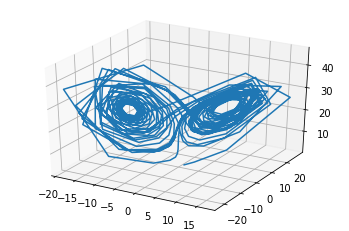

In [108]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(true[:,0], true[:,1], true[:,2])
plt.show()

In [ ]:
if test_which==0 or test_which==2:
    

In [115]:
arr = np.array([[1,2],[3,4]])
np.diag(arr,1)

array([2])

In [162]:
def GaussHermite(n):

    # This function determines the abscisas (x) and weights (w) for the
    # Gauss-Hermite quadrature of order n>1, on the interval [-INF, +INF].
    # This function is valid for any degree n>=2, as the companion matrix
    # (of the n'th degree Hermite polynomial) is constructed as a
    # symmetrical matrix, guaranteeing that all the eigenvalues (roots)
    # will be real.
    # Building the companion matrix CM
    # CM is such that det(xI-CM)=L_n(x), with L_n the Hermite polynomial
    # under consideration. Moreover, CM will be constructed in such a way
    # that it is symmetrical.
    i   = np.arange(n)
    a   = np.sqrt(i/2)
    CM  = np.diag(a,1) + np.diag(a,-1)

    # Determining the abscissas (x) and weights (w)
    # - since det(xI-CM)=L_n(x), the abscissas are the roots of the
    #   characteristic polynomial, i.d. the eigenvalues of CM;
    # - the weights can be derived from the corresponding eigenvectors.
    L,V = np.linalg.eig(CM)
    ind = sorted(range(len(L)), key=lambda k: L[k])
    x = L[ind]
    idx = np.empty_like(ind)
    idx[ind] = np.arange(len(ind))
    V  = V[:,ind].T
    w  = np.sqrt(np.pi) * V[:,0]**2
    return x,w

In [163]:
 GaussHermite(3)

[0.         0.70710678 1.        ]
[-1.22474487e+00  1.22474487e+00 -4.24982108e-17  0.00000000e+00]


(array([-1.22474487e+00, -4.24982108e-17,  0.00000000e+00,  1.22474487e+00]),
 array([0.        , 0.        , 1.77245385, 0.        ]))

In [144]:
idx

array([-4597049319638433792, -4601552919265804288,                    0,
        4621819117588971520,  4626322717216342016])

In [ ]:
def PCE_Lorenz(X1,X2,X3,Dt,sigma,beta,rho)
    # PCE expansion for the Stochastic Galerkin to be applied to the PCE-EnKF
    # For the Lorenz 63' system
    # Initializes ODE solvers
    [loc,wei] = GaussHermite(3);
    loc = loc*np.sqrt(2);
    wei = wei/np.sqrt(pi);
    #%% Creates the initial condition of the coefficients
    X = np.array([X1,X2,X3])
    # Creates the unintegrated rhs of the coefficient odes
    V_vec = ode45(@(t,x) lorenz_63_coeff(t,x,beta,sigma,rho,wei,loc),[0,Dt],X);
    coeff = V_vec.y(:,end);
    X1 = reshape((coeff(1:27)),3,3,3);
    X2 = reshape((coeff(28:54)),3,3,3);
    X3 = reshape((coeff(55:81)),3,3,3);
return X1,X2,X3

In [ ]:
if (test_which == 1) or (test_which == 2)
    Xprior = np.matlib.repmat(v0,nbv,1).T + np.sqrt(Q_init)*np.random.randn(state_dim,nbv)
    X = Xprior.copy()
    X1 = np.zeros([3,3,3]);
    X2 = np.zeros([3,3,3]);
    X3 = np.zeros([3,3,3]);
    X1[0,0,0] = v0(1);
    X2[0,0,0] = v0(2);
    X3[0,0,0] = v0(3);
    X1[0,0,0] = np.sqrt(Q_init);
    X2[0,0,0] = np.sqrt(Q_init);
    X3[0,0,0] = np.sqrt(Q_init);
    for i=1:n_cycle
        [X1f,X2f,X3f] = PCE_Lorenz(X1,X2,X3,Dt,sigma,beta,rho);
        y2(:,i) = H*true2(:,i+1) + sqrt(R)*randn(meas_dim,1);
        [ma2(:,i+1),C2(:,:,i+1),X1,X2,X3] = PCEEnKF(X1f,X2f,X3f,gen_func,H,y2(:,i),R,Q,nbv);
    end

In [55]:
v0 = [1.508870, -1.531271, 25.46091]';    % True initial condition of the Lorenz 63 model
sigma = 10;
beta = 8/3;
rho = 28;
H = eye(1,3);                             % Measurement operator

%% Relevant parameters for DA
Q = 10;                                   % Variance of the model error
R = 1;                                   % Variance of the data error
Q_init = 100;                               % Variance of the initial condition
n_cycle = 100;                            % Number of data assimilation cycles
[meas_dim , state_dim] = size(H);         % Measurement dim and state dim
Dt = .1;                                  % Frequency of measurement
nbv = 1000;                              % Ensemble number
test_which = 1;                           % 0 - EnKF / 1 - PCE / 2 - Both / 3 - Both only plot comparison and leave it open
folder = './Figures';
%% PCE Function
gen_func = @(X1,X2,X3,x,y,z) [sum(sum(sum(hermite_matrix(x,y,z).*X1)));sum(sum(sum(hermite_matrix(x,y,z).*X2)));sum(sum(sum(hermite_matrix(x,y,z).*X3)))];
%% Initialize all containers
y = zeros(meas_dim,n_cycle);
y2 = zeros(meas_dim,n_cycle);
true = zeros(state_dim,n_cycle+1);
true2 = zeros(state_dim,n_cycle+1);
ma = zeros(state_dim,n_cycle+1);
ma2 = zeros(state_dim,n_cycle+1);
C = zeros(state_dim,state_dim,n_cycle+1);
C2 = zeros(state_dim,state_dim,n_cycle+1);
true(:,1) = v0;
true2(:,1) = v0;
ma(:,1) = v0;
ma2(:,1) = v0;
C(:,:,1) = Q_init*eye(state_dim);
C2(:,:,1) = Q_init*eye(state_dim);
Xprior = repmat(v0,1,nbv) + sqrt(Q_init)*randn(state_dim,nbv);
X = Xprior;

for i = 1:n_cycle     
    true_tmp = ode45(@(t,x) lorenz_63(t,x,10,8/3,28),[0,Dt],true(:,i));
    true(:,i+1) = true_tmp.y(:,end);
    true2(:,i+1) = true(:,i+1);
end

if (test_which == 0) || (test_which == 2)
    %% Perform standard SREnKF
    rng(1)
    tic();
    for i=1:n_cycle
        for j=1:nbv
            samp_tmp = ode45(@(t,x) lorenz_63(t,x,10,8/3,28),[0,Dt],X(:,j));
            Xprior(:,j) = samp_tmp.y(:,end)+sqrt(Q_init)*randn(state_dim,1);
        end
        y(:,i) = H*true(:,i+1) + sqrt(R)*randn(meas_dim,1);
        X = SREnKF(Xprior,H,y(:,i),R,nbv);
        ma(:,i+1) = mean(X,2);
        C(:,:,i+1) = (X-ma(:,i+1))*(X-ma(:,i+1))'/(nbv-1);
    end
    toc()
end
if (test_which == 1) || (test_which == 2)
    %% Perform PCE-SREnKF
    rng(1)
    Xprior = repmat(v0,1,nbv) + sqrt(Q_init)*randn(state_dim,nbv);
    X = Xprior;
    tic();
    X1 = zeros(3,3,3);
    X2 = zeros(3,3,3);
    X3 = zeros(3,3,3);
    X1(1,1,1) = v0(1);
    X2(1,1,1) = v0(2);
    X3(1,1,1) = v0(3);
    X1(2,1,1) = sqrt(Q_init);
    X2(1,2,1) = sqrt(Q_init);
    X3(1,1,2) = sqrt(Q_init);
    for i=1:n_cycle
        [X1f,X2f,X3f] = PCE_Lorenz(X1,X2,X3,Dt,sigma,beta,rho);
        y2(:,i) = H*true2(:,i+1) + sqrt(R)*randn(meas_dim,1);
        [ma2(:,i+1),C2(:,:,i+1),X1,X2,X3] = PCEEnKF(X1f,X2f,X3f,gen_func,H,y2(:,i),R,Q,nbv);
    end
    toc()
end

[(1, 2),
 (0, 0),
 (3, 2),
 (0, 1),
 (1, 3),
 (4, 1),
 (3, 3),
 (1, 4),
 (3, 0),
 (0, 2),
 (3, 1),
 (4, 4),
 (2, 1),
 (0, 4),
 (2, 0),
 (4, 3),
 (2, 2),
 (1, 0),
 (2, 4),
 (4, 0),
 (2, 3),
 (4, 2),
 (3, 4),
 (1, 1),
 (0, 3)]

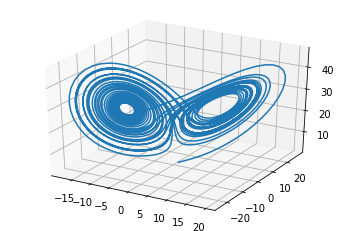

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
def f(state, t):
    x, y, z = state # unpack the state vector return
    return sigma*(y-x),x*(rho-z)-y,x*y-beta*z #derivatives
    
state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)
states = odeint(f, state0, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

In [88]:
temp = odeint(lorenz_63, state0,t)

In [89]:
temp = odeint(lorenz_63, true[:,0],np.arange(0,Dt,0.01))

In [95]:
temp.shape

(10, 3)